# Finding the Roots of Himmelblau's function using Simulated Annealing

## Simulated Annealing Algorithm

### Search Space
- $ x_0 $ - Initial Solution
- $ x_i $ - solution i 
- $ x_f $ - final solution
- $ f(x_i) $ - objective function evaluated at $ x_i $

### Variables
- $ T_o $ - initial temperature
- $ T_t $ - temperature at stage $ t $
- $ T_f $ - final temperature
- $ \alpha $ - cooling parameter
- $ M $ - number of temperatures
- $ N(t) $ - number of moves at temperature $ T_t $
- $ \sigma $ - move operator

### Methodology
1. Set $ T_0 $, $ M $, $ N $, $ \alpha $, and type of move operator
2. start $ m = 1 $
3. Start at a random point in the search space, $ x_i $
4. Move to another location using the move operator, $ x_t $
5. Look around the neighborhood (points around your location) and move to one of them, $ n = 1 $
6. Check if the Objective function is better
    - If yes, take it
    - if no, take a random number and check if the random number is less than: $$ \frac{1}{\exp(\frac{f(x_{tmp}) - f(x_i))}{T_t})} $$
    - if less the number evaluated is less than the number from the formula, take it
    - if greater, don't take it and stay where you are, and look for another point
    - $ n = n + 1 $
7. Do this $ N $ times
8. $ m = m + 1 $
9. $ T_{t+1} = \alpha * T_t $
10. Repeat steps 5 to 9 $M - 1 $ times
11. Get $x_{final}$, note: keep track of the best solution. 

Himmelblau's function Equation:

$$ f(x,y) = (x^2 + y - 11)^2 + (x+y^2-7)^2 $$

Local Minimas

- $ f(3.0,2.0) = 0.0 $
- $ f(-2.805118, 3.131312) = 0.0 $
- $ f(-3.779310, -3.283186) = 0.0 $
- $ f(3.584428, -1.848126) = 0.0 $
- $ f(-0.270845, -0.923039) = 181.617 $



### Step 1: Importing statements

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

### Step 2: Define the Objective Function

In [2]:
def Objective_Function(z):
    x = z[0]
    y = z[1]
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2 

In [3]:
def Random_Number_Check(objective_old, objective_new, Init_temp):
    return 1/((np.exp(objective_old - objective_new)) / Init_temp)

### Step 3: Initialize design variables

In [4]:
# design variables related to the obejective function
x0 = -5
y0 = -5

# intermediate variables 
k = 0.05 # move variable's constant
M = 300 # number of loops to be performed
T0 = 10000 # initial temperature
N = 15 # initial number of neighbors per search space loop
alpha = 0.85 # cooling parameter

In [5]:
temp = [] # storing of values for the temperature per loop M
min_z = [] # storing best value of the objective function per loop M
x = [] # storing x values per loop for plotting purposes
y = [] # storing y values per loop for plotting purposes

### Step 4: Simulated Annealing Algorithm

In [6]:
for m in range(M):
    for n in range(N):
        xt = 0 # initialize random point in search space
        yt = 0 # initialize random point in search space

        random_x = np.random.rand(1)
        random_y = np.random.rand(1)
        
        if random_x >= 0.5:
            x_new = k*random_x
        else:
            x_new = -k*random_x
        
        if random_y >= 0.5:
            y_new = k*random_y
        else:
            y_new = -k*random_y  

        x_new = x0 + x_new
        y_new = y0 + y_new     

        z_computed = Objective_Function([x_new, y_new])
        z_old = Objective_Function([x0, y0])

        check = Random_Number_Check(z_computed, z_old, T0)
        random_number = np.random.rand(1)

        if z_computed <= z_old:
            x0 = x_new
            y0 = y_new
        elif random_number <= check:
            x0 = x_new
            x0 = y_new
        else:
            x0 = x0
            y0 = y0

    temp.append(T0)
    min_z.append(z_old)
    x.append(x0)
    y.append(y0)
    
    T0 = alpha * T0

### Step 5: Plots and Results

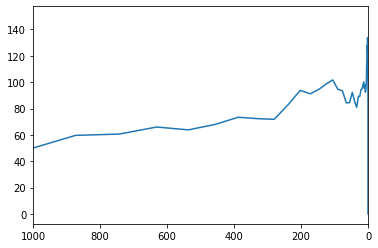

In [7]:
plt.xlim(1000, 0)
plt.plot(temp, min_z)

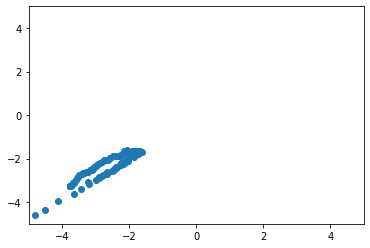

In [8]:
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.scatter(x,y)

In [9]:
print("final x location: {}".format(np.round(x0,4)))
print("final y location: {}".format(np.round(y0,4)))
print("final Objective function: {}".format(min_z[-1]))

final x location: [-3.7831]
final y location: [-3.2845]
final Objective function: [0.00075732]


### Using Scipy Optimize Package

In [10]:
from scipy.optimize import minimize

In [11]:
minimize(Objective_Function,[x0,y0])

      fun: 6.47839420726096e-15
 hess_inv: array([[0.00931275, 0.00298398],
       [0.00298398, 0.01228233]])
      jac: array([ 1.60381504e-06, -3.42525083e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([-3.77931025, -3.283186  ])